#                                                                           MODULE A
### NOME: FILIPE DE ORNELAS DIOGO OBRIST
### Nº: 2024170686

2. Data loading and visualization:

2.1 Create a dictionary with the different classes of the problem as keys (‘forward’,
‘backward’, ‘left’, ‘right’, ‘stop’, ‘_silence_’ and ‘_unknown_’) and the list of the sound
filenames of that same class as values.

2.2 Analise the number of samples of each class. Is the dataset balanced? If not, what are
possible consequences that will be generated if no special action is taken in regard to that
unbalance?

In [32]:
# MODULE A

# Make a dictionary with keys: 'forward', 'backward', 'left', 'right', 'stop', '_silence_', '_unknown_'
# The values: List of the sound filenames of that same class as values
import os

# 2.1 Create a dictionary with keys
Commands = {}

for command in ['forward', 'backward', 'left', 'right', 'stop', '_silence_', '_unknown_']:
    Commands[command] = []
    
    for root, dirs, files in os.walk('dataset/' + command):
        for file in files:
            if file.endswith('.wav'):
                Commands[command].append(file)

# 2.2 Compare the number of files in each class
for key in Commands.keys():
    print(key, len(Commands[key]))



forward 1557
backward 1664
left 3801
right 3778
stop 3872
_silence_ 408
_unknown_ 635


NOTE: As we can see by the number of samples for each class, we can see that there is a big difference between the silence, uknown and the rest. This two have way fewer samples. Forward and backward are also a little bit different in this aspect, having half the amount of samples of the rest of the classes.
With this, we can conclude that no, the dataset is not balanced. If no special action is taken in regard to this unbalance, we could have problems like the model being bias towards the class with more samples, or worst identification of the classes with fewer samples, etc. (Mainly overall reduced model performance).

2.3 func(filename, class) of a dataset sound, loads it from the file and returns it as a numpy array
Note: Normalize the sound before returning it so it is in the range [-1, 1].

In [33]:
# 2.3 func(filename, class) of a dataset sound, loads it from the file and returns it as a numpy array
# Note: Normalize the sound before returning it so it is in the range [-1, 1].
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

def loadSound(filename, class_name):
    # Load the sound
    fs,y = wavfile.read('dataset/' + class_name + '/' + filename)
    # Normalize the sound with the formula professor gave us
    y = y/(abs(np.iinfo(np.int16).min))
    
    
    return fs,y

# Test the function
# Test minimum and maximum values to check if its normalized
fs,y = loadSound(Commands['forward'][0], 'forward')
print(y)
print(np.min(y), np.max(y))





[ 0.00000000e+00 -1.22070312e-04 -9.15527344e-05 ...  7.98034668e-02
  7.30285645e-02  5.71899414e-02]
-0.218780517578125 0.169403076171875


2.4 envelope(signal). Returns a signal with the same length as the original sound containing the 'envelope' of the sound.
Possible approach is applying a moving average to the absolute value of the signal.
Especial care must be taken on the limits of the signal. Use zero padding to avoid boundary effects.

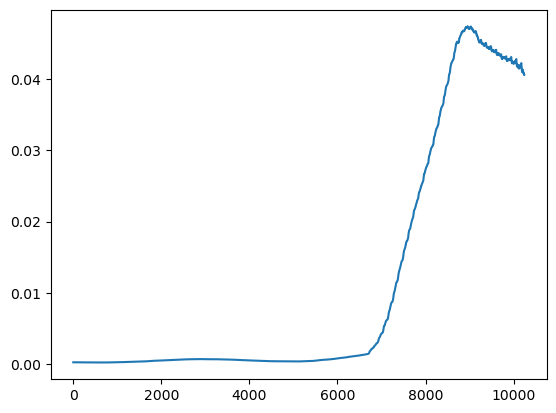

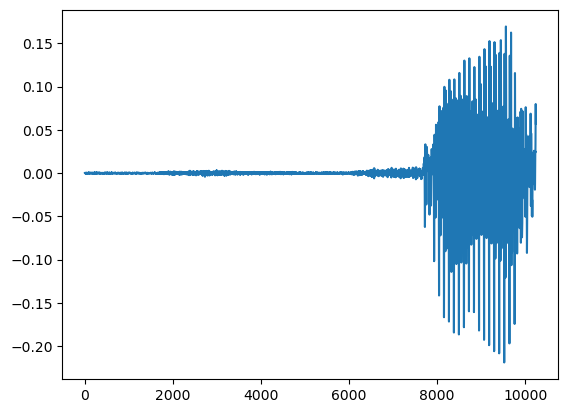

In [34]:
# 2.4 envelope(signal). Returns a signal with the same length as the original sound containing the 'envelope' of the sound.
# Possible approach is applying a moving average to the absolute value of the signal.
# Especial care must be taken on the limits of the signal. Use zero padding to avoid boundary effects.

def envelope(signal, w):
    # For 3.2 to otimize the function
    if w == 1:
        return np.abs(signal)

    # Calculate the envelope
    envelope = np.zeros(len(signal))
    for i in range(len(signal)):
        envelope[i] = np.mean(np.abs(signal[max(0, i-w):min(len(signal), i+w)]))

    return envelope

# Test the function
plt.plot(envelope(y, 999))
plt.show()

plt.plot(y)
plt.show()


2.5 func() selects one sample from each class randomly and generates a figure with 7 subplots displaying the sound signal over time.
Force the x-axis of all plots to show the time from 0 to 1 second (remember that the sounds have different lengths).

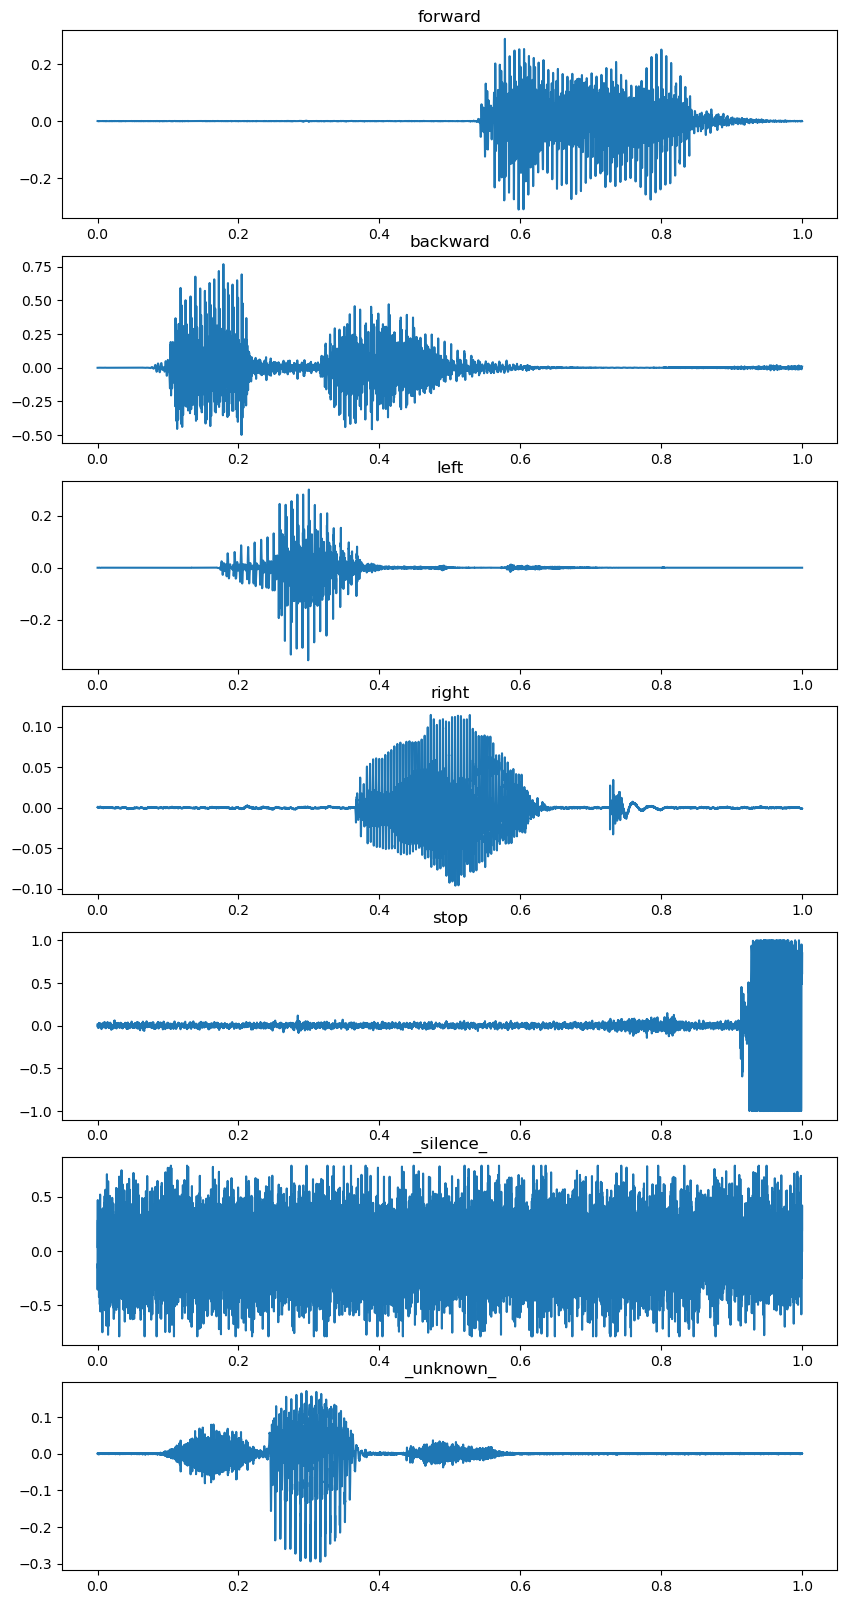

In [35]:
# 2.5 func() selects one sample from each class randomly and generates a figure with 7 subplots displaying the sound signal over time.
# Force the x-axis of all plots to show the time from 0 to 1 second (remember that the sounds have different lengths).

def plotSound():
    fig, axs = plt.subplots(7, 1, figsize=(10, 20))
    for i, key in enumerate(Commands.keys()):
        fs, y = loadSound(Commands[key][np.random.randint(len(Commands[key]))], key)
        axs[i].plot(np.linspace(0, 1, len(y)), y)
        axs[i].set_title(key)

    plt.show()

# Test the function
plotSound()

3. Outliers’ detection: Each sound file has a duration up to 1s, but some might be shorter. To
take a grasp of abnormal sounds, we will analyze the duration of the sounds and the mean
amplitude of its envelope (computed in 2.4).

3.1 Create a function that returns an array with the duration of each sound of a given class.

In [36]:
# 3.1 Create a function that returns an array with the duration of each sound of a given class.
def getDurations(class_name):
    durations = []
    for file in Commands[class_name]:
        fs, y = loadSound(file, class_name)
        durations.append(len(y)/fs)
    return durations

# Test the function
durations = getDurations('stop')
print(durations)

# For all classes
def getAllDurations():
    durations = {}
    for key in Commands.keys():
        durations[key] = getDurations(key)
    return durations

[0.8359375, 0.4693125, 1.0, 0.682625, 0.554625, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.981375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.853375, 0.9386875, 0.725375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8359375, 0.97525, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.853375, 1.0, 1.0, 1.0, 0.853375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.896, 1.0, 0.8106875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9813125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.97525, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.853375, 0.853375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.97525, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8533125, 0.810625, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7585, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8359375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

3.2 Create a function that returns an array with the average amplitude of the
envelope of each sound of a given class.


In [37]:
# 3.2 Create a function that returns an array with the average amplitude of the envelope of each sound of a given class.
def getAmplitudes(className):
    amplitudes = []
    for file in Commands[className]:
        fs, sound = loadSound(file, className)
        envelope_s = envelope(sound, 1)
        amplitudes.append(np.mean(envelope_s))
    return amplitudes

# Test the function
amplitudes = getAmplitudes('stop')
print(amplitudes)

# For all classes
def getAllAmplitudes():
    amplitudes = {}
    for key in Commands.keys():
        amplitudes[key] = getAmplitudes(key)
    return amplitudes

[0.006767772068487149, 0.014092931418495722, 0.011835092544555665, 0.020342866135831063, 0.009754953820720997, 0.015965913772583006, 0.03270008277893066, 0.008833173751831055, 0.030788204193115235, 0.04072335433959961, 0.009800457000732421, 0.009008438110351562, 0.02474251937866211, 0.025266489028930663, 0.023808725357055666, 0.025232603073120117, 0.025614784240722655, 0.015872999191284178, 0.015469337417705547, 0.028257625579833984, 0.030546585083007814, 0.03484258079528808, 0.035560441970825196, 0.03640094375610352, 0.03536676788330078, 0.022544252395629884, 0.05646681594848633, 0.050508744164513376, 0.040802231561376426, 0.07277481576070567, 0.005460409164428711, 0.006044332504272461, 0.007322719573974609, 0.05393950653076172, 0.06413977622985839, 0.022914796829223632, 0.02292168561988902, 0.014775604506206342, 0.0547204761505127, 0.02707174491882324, 0.011532554626464844, 0.005750471115112304, 0.006536361694335938, 0.023711341857910156, 0.018171689987182618, 0.02465244483947754, 0.

3.3 Create a function called that given an array of values, a method name (‘iqr’
or ‘zscore’), and any additional parameters needed, returns the outliers’ density
and a list with the indexes of such outliers. Note that the outliers’ density is
calculated by d = (no/nr)*100 where no is the number of elements identified as outliers and nr is the total
number of elements in the array.

In [38]:
# 3.3 Create a function called that given an array of values, a method name (‘iqr’
# or ‘zscore’), and any additional parameters needed, returns the outliers’ density
# and a list with the indexes of such outliers. Note that the outliers’ density is
# calculated by d = (no/nr)*100 where no is the number of elements identified as outliers and nr is the total
# number of elements in the array.

def z_score(data, k):
    mean = data.mean()
    std = data.std()
    z_score = abs((data - mean) / std)
    return data[z_score < k], data[z_score >= k]

def iqr(data, k):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return data[(data >= lower) & (data <= upper)], data[(data < lower) | (data > upper)]

def outliersDensity(data, method, k):
    if method == 'zscore':
        inliers, outliers = z_score(data, k)
    elif method == 'iqr':
        inliers, outliers = iqr(data, k)
    else:
        raise ValueError('Method not supported')
    return len(outliers) / len(data) * 100, outliers

# Test the function
something = np.random.normal(0, 1, 100)
print(outliersDensity(something, 'zscore', 2))
print(outliersDensity(something, 'iqr', 1.5))

(3.0, array([-3.75891238, -2.23844601,  2.12897614]))
(1.0, array([-3.75891238]))


3.4 For each variable (duration and avg_amplitude):

3.4.1. Plot the histogram of the variable for each class

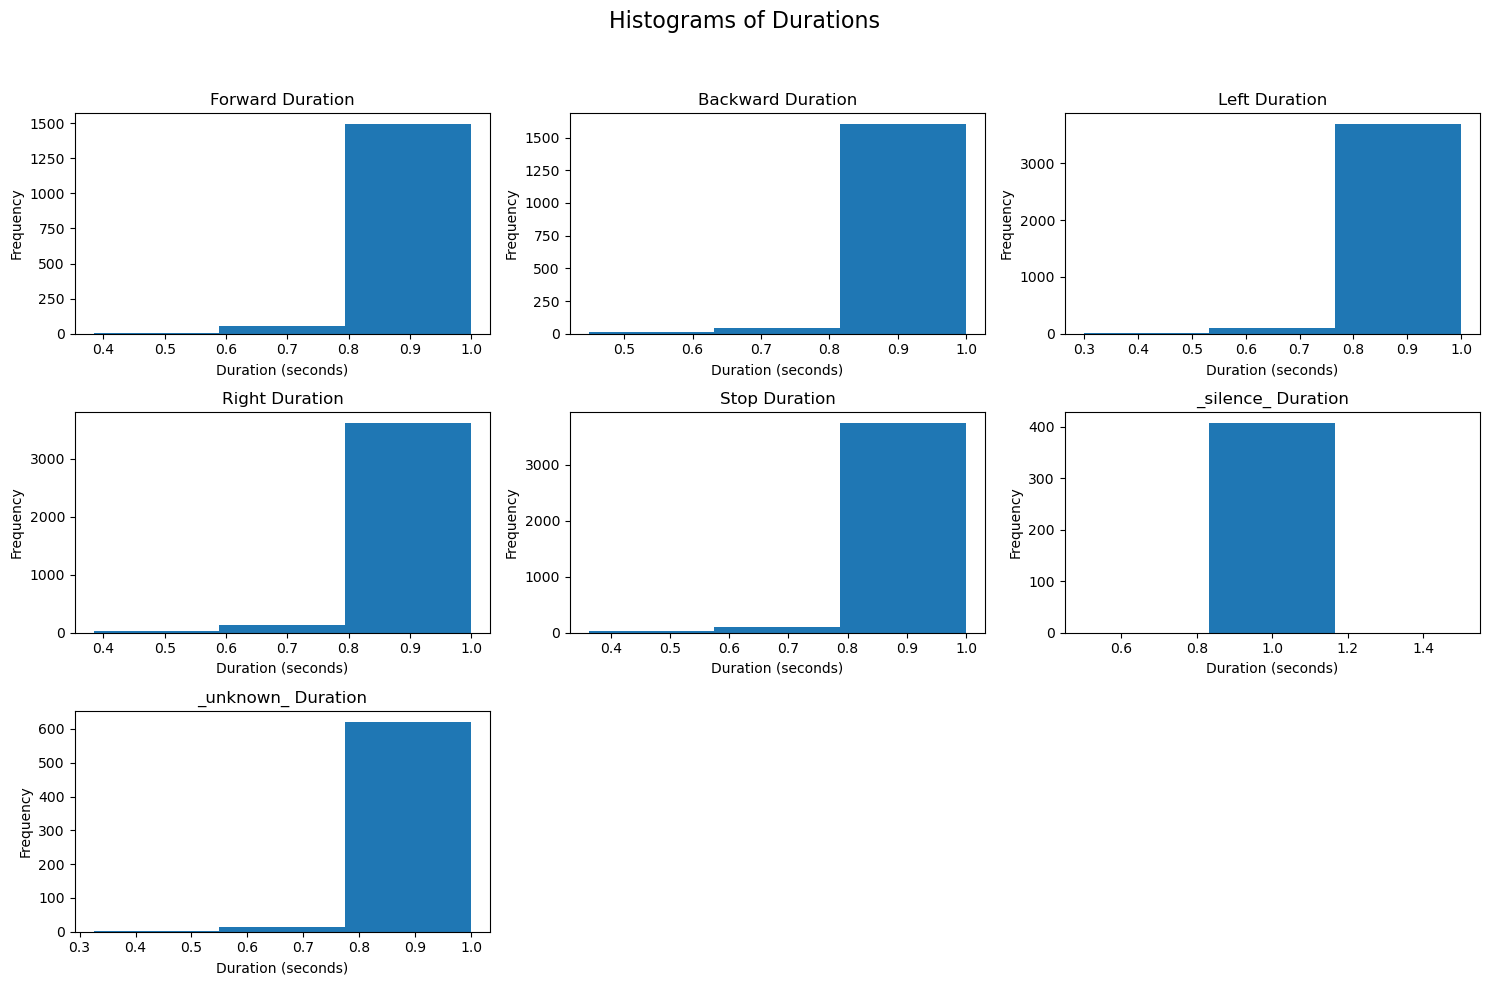

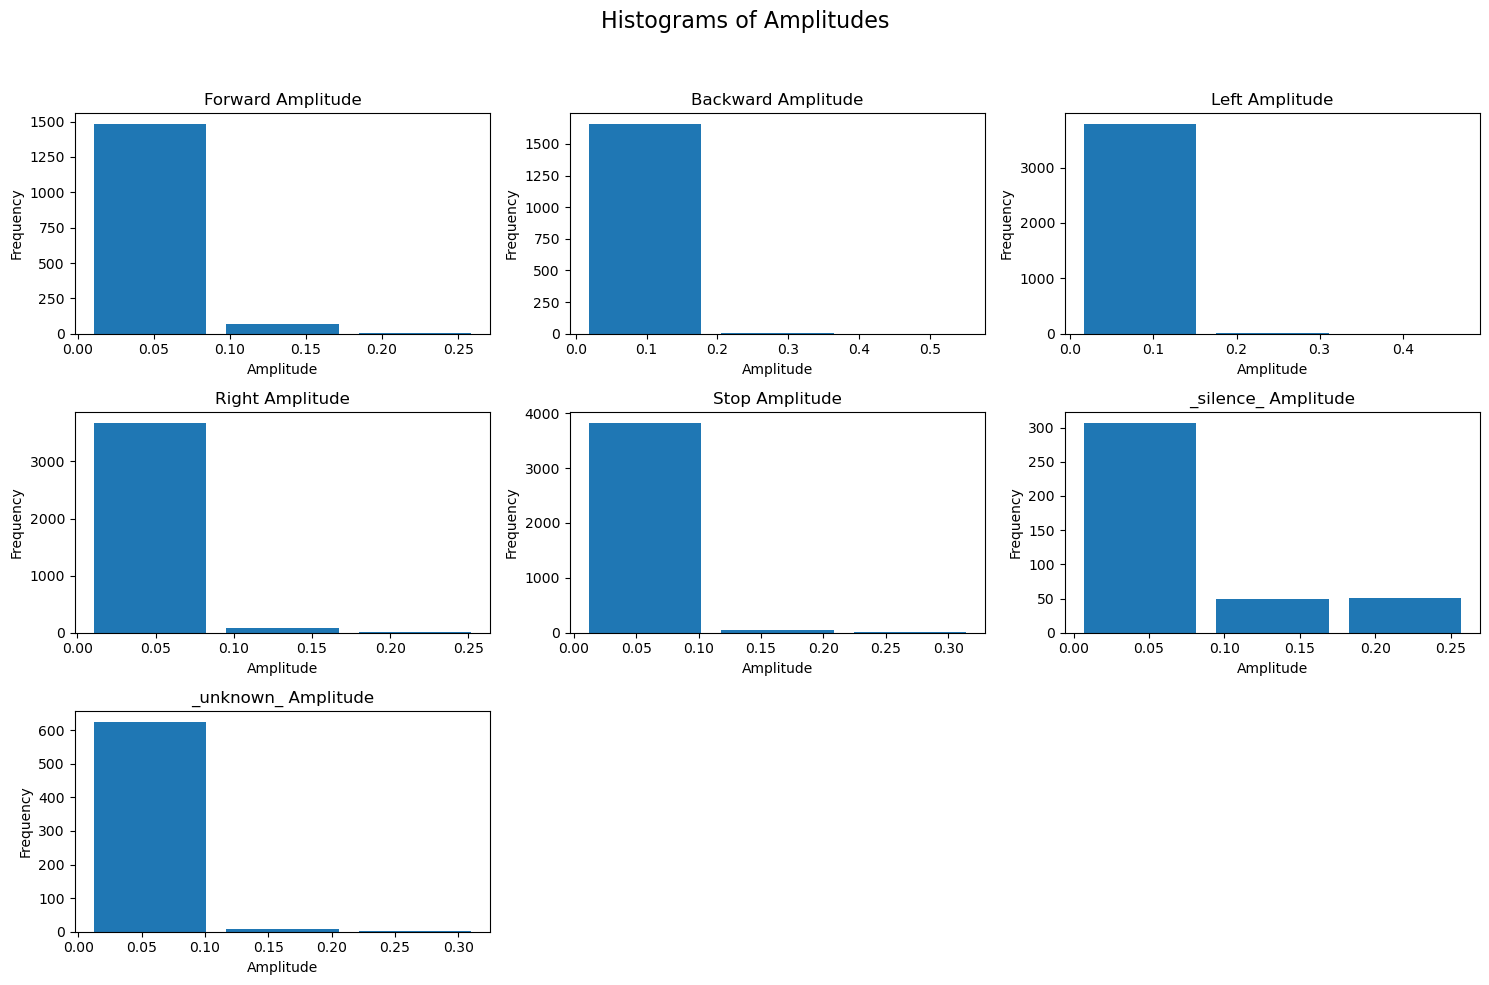

In [39]:
# For each variable (duration and avg_amplitude):
# 3.4.1 Plot the histogram of the variable for each class.

# Duration
def durationHistogram(X):

    # Just some code to configure our plot for a better visualization
    fig, axs = plt.subplots(3, 3, figsize=(15, 10))
    axs = axs.flatten()

    for i, key in enumerate(X.keys()):
        durations = getDurations(key)
        axs[i].hist(durations, bins=3)
        axs[i].set_title(f'{key.capitalize()} Duration')
        axs[i].set_xlabel('Duration (seconds)')
        axs[i].set_ylabel('Frequency')

    for ax in axs[len(X.keys()):]:
        ax.set_visible(False)

    fig.suptitle(f'Histograms of Durations', fontsize=16)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Average Amplitude
from functools import lru_cache

# MY TENTATIVE TO MAKE THIS GO FASTER - IT DIDN'T WORK THAT WELL :/
@lru_cache(maxsize=None)
def getAmplitudesCached(key):
    return getAmplitudes(key)

def amplitudeHistogram(X):
    fig, axs = plt.subplots(3, 3, figsize=(15, 10))
    axs = axs.flatten()
    
    for i, key in enumerate(X.keys()): 
        amplitudes = getAmplitudesCached(key)  # Use cached version
        # Optionally downsample large data for faster plotting
        # ANOTHER TENTATIVE TO MAKE THIS GO FASTER
        if len(amplitudes) > 10000:  # If dataset is large, downsample
            amplitudes = np.random.choice(amplitudes, size=10000, replace=False)

        axs[i].hist(amplitudes, bins=3, rwidth=0.85)
        axs[i].set_title(f'{key.capitalize()} Amplitude')
        axs[i].set_xlabel('Amplitude')
        axs[i].set_ylabel('Frequency')

    for ax in axs[len(X.keys()):]:
        ax.set_visible(False)

    fig.suptitle(f'Histograms of Amplitudes', fontsize=16)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

X = Commands
durationHistogram(X)
amplitudeHistogram(X)

3.4.2 Make a scatter plot where all points for each class are present, with
the outliers showing with a different color 

C:\Users\PC\AppData\Local\Temp\ipykernel_9388\2145431648.py:10: RuntimeWarning: invalid value encountered in divide
  z_score = abs((data - mean) / std)


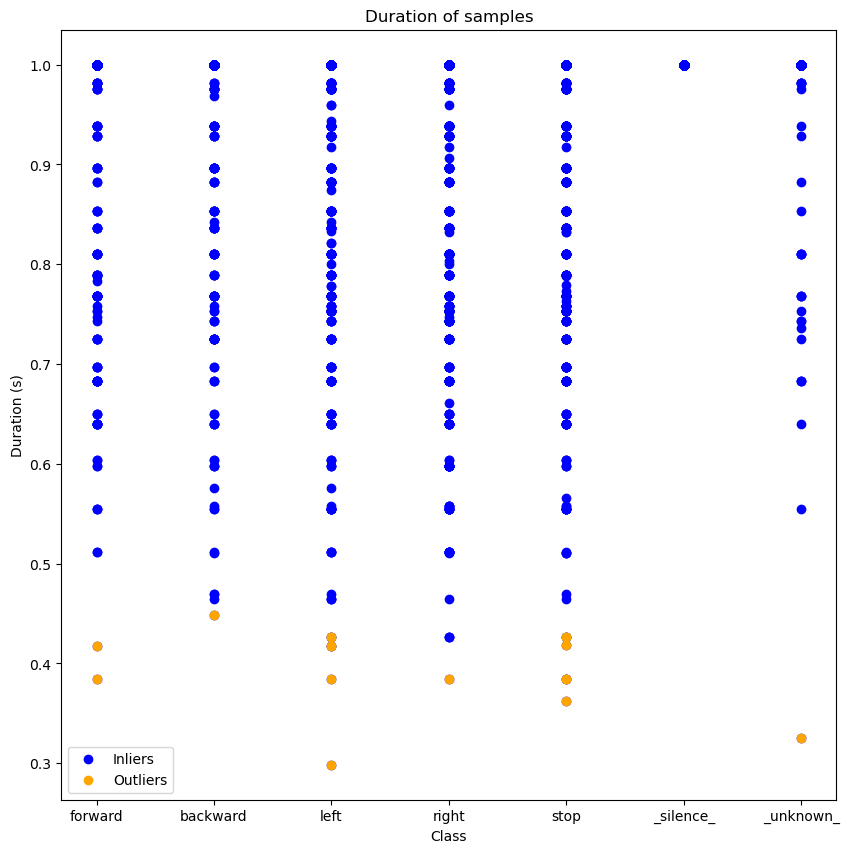

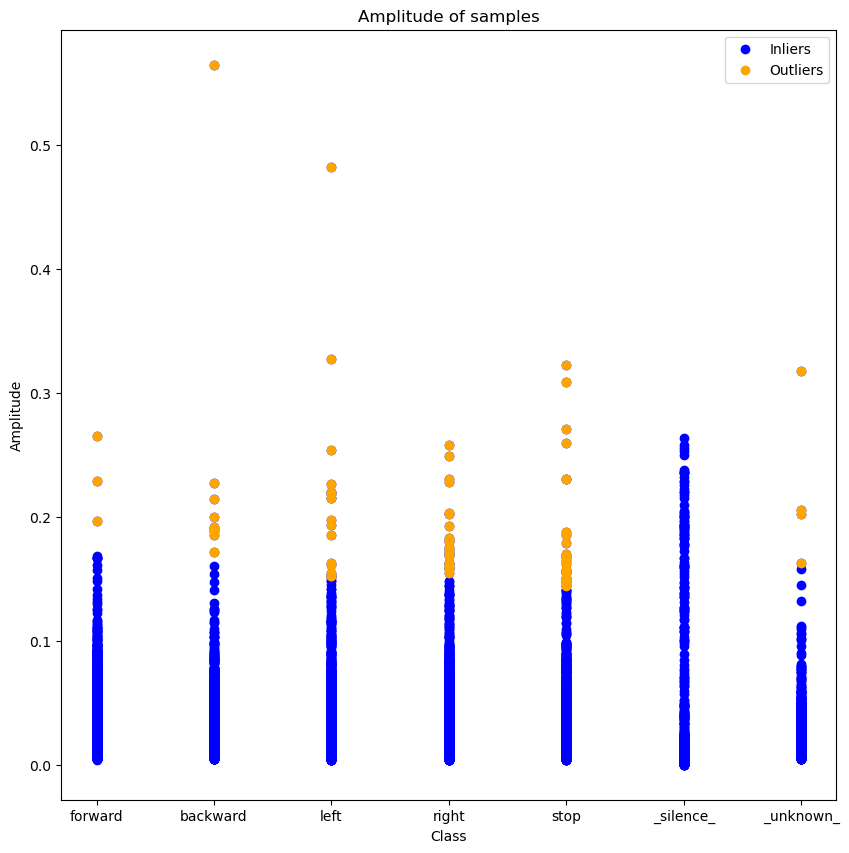

In [40]:
# 3.4.2 Make a scatter plot where all points for each class are present, with
# the outliers showing with a different color.

# Duration
def scatterDuration(X):
    # put all classes in a single plot. They all have same color (blue), and the outliers are orange
    fig, ax = plt.subplots(figsize=(10, 10))
    for key in X.keys():
        durations = getDurations(key)
        _, outliers = outliersDensity(np.array(durations), 'zscore', 8.5)
        # If the point is an outlier, plot it in orange
        ax.scatter([key] * len(durations), durations, color='blue')
        ax.scatter([key] * len(outliers), outliers, color='orange')
    ax.set_xlabel('Class')
    ax.set_ylabel('Duration (s)')
    ax.set_title('Duration of samples')
    plt.legend(['Inliers', 'Outliers'])
    plt.show()

# Test the function
X = Commands
scatterDuration(X)

# Average Amplitude
def scatterAmplitude(X):
    # put all classes in a single plot. They all have same color (blue), and the outliers are orange
    fig, ax = plt.subplots(figsize=(10, 10))
    for key in X.keys():
        amplitudes = getAmplitudesCached(key)
        not_used, outliers = outliersDensity(np.array(amplitudes), 'zscore', 5) # Test with 3, 3.5, 4...
        # If the point is an outlier, plot it in orange
        ax.scatter([key] * len(amplitudes), amplitudes, color='blue')
        ax.scatter([key] * len(outliers), outliers, color='orange')
    ax.set_xlabel('Class')
    ax.set_ylabel('Amplitude')
    ax.set_title('Amplitude of samples')
    plt.legend(['Inliers', 'Outliers'])
    plt.show()

# Test the function
scatterAmplitude(X)


### Multivariate Approach

- For this part, the duration and avg_amplitude will be considered together to
identify the outliers


3.5 Create a function that implements the K-MEANS for a given number of
clusters (input parameter)

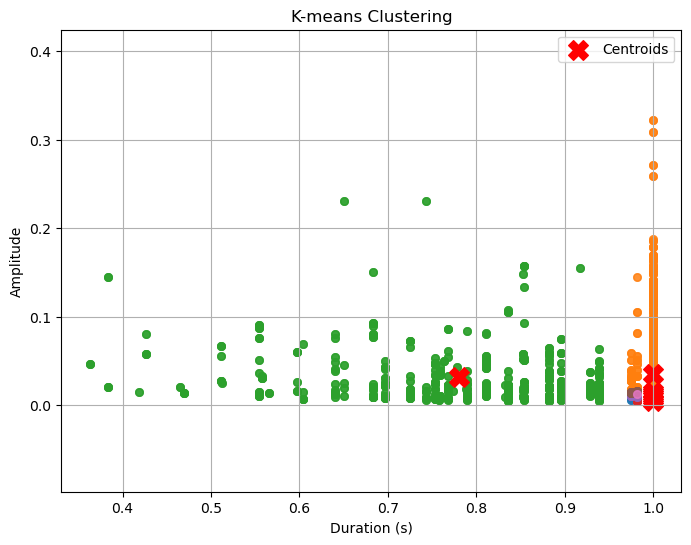

Converged after 31 iterations.


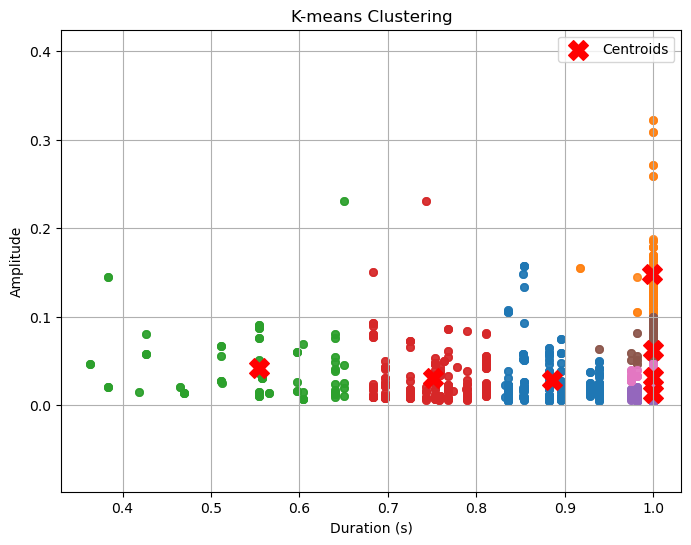

In [41]:
# For this part, the duration and avg_amplitude will be considered together to
# identify the outliers
# 3.5 Create a function that implements the K-MEANS for a given number of
# clusters (input parameter)


# IMPLEMENTATION FOLLOWING THE SLIDES
def kmeans(X, k, max_iters=100):
    # Step 1: Randomly initialize k centroids from the data points
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    

    def plotClusters(X, centroids, labels):
        plt.figure(figsize=(8, 6))
        
        # Plot each cluster
        for i in range(len(centroids)):
            points = X[labels == i]
            if len(points) == 0:
                continue  # Skip empty clusters
            plt.scatter(points[:, 0], points[:, 1], s=30, alpha=0.6)
        
        # Plot centroids in red with larger markers
        plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
        
        # Customizing the plot
        plt.title('K-means Clustering')
        plt.xlabel('Duration (s)')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(True)
        plt.axis('equal')
        plt.show()

    # Here we use max_iters to avoid infinite loops in case of non-convergence
    for i in range(max_iters):
        # Step 2: Assign each point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Step 3: Recompute the centroids as the mean of the points in each cluster (Update)
        temp_centroids = np.zeros_like(centroids)
        for j in range(k):
            if len(X[labels == j]) > 0:
                temp_centroids[j] = X[labels == j].mean(axis=0)
            else:
                temp_centroids[j] = centroids[j]

        

        # Step 4: Check for convergence (if centroids don't change)
        if np.array_equal(centroids , temp_centroids):
            break
        
        centroids = temp_centroids

        if i == max_iters - 1:
            print("Maximum number of iterations reached. Consider increasing max_iters.")

        # Visualize the first iteration
        if i == 0:
            plotClusters(X, centroids, labels)
        
    # Visualize the final state
    print(f"Converged after {i + 1} iterations.")
    plotClusters(X, centroids, labels)

    return centroids, labels

# THIS IS A TEST CLASS BY CLASS
# Test the function with our data
# durations = getDurations('_unknown_')
# amplitudes = getAmplitudes('_unknown_')
# X = np.array(list(zip(durations, amplitudes)))
# k = 3  # Number of clusters
# centroids, labels = kmeans(X, k)

# As the teacher said, we will now plot all classes together, with k=7
all_durations = getAllDurations()
all_amplitudes = getAllAmplitudes()
X = np.array([[durations[i], amplitudes[i]] for key in all_durations.keys() for i in range(len(all_durations[key]))])
k = 7  # Number of clusters
centroids, labels = kmeans(X, k)

3.6 Analyze the outliers of the dataset using the k-means (each sample is now
characterized by the two variables). Try several numbers of clusters. Make 2D
plots to illustrate the results

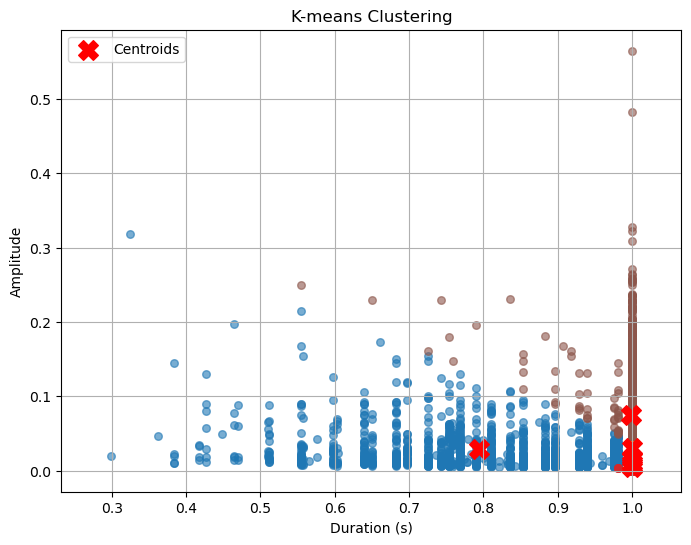

Converged after 76 iterations.


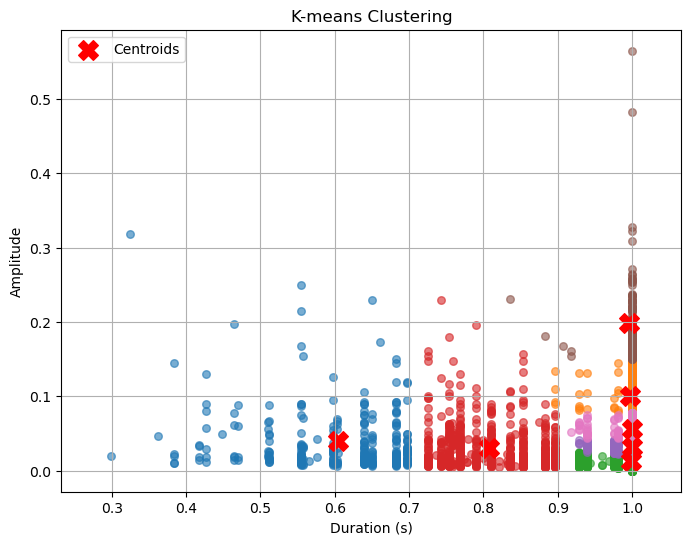

Found 48 outliers out of 15715 points (0.31%).


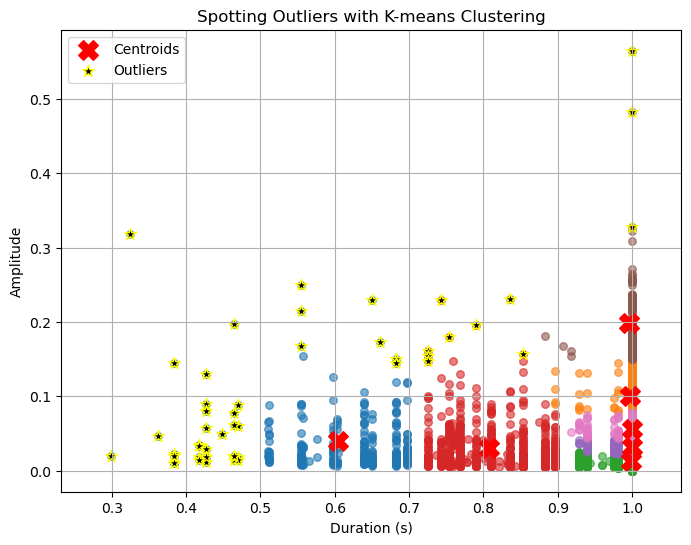

In [42]:
# 3.6 Analyze the outliers of the dataset using the k-means (each sample is nowcharacterized by the two variables). 
# Try several numbers of clusters. Make 2D plots to illustrate the results

# Analyze outliers using K-Means

# Function to analyze and visualize outliers using the K-means function
def analyzeOutliersWithKmeans(X, k, threshold_percentile=95, max_iters=100):
    centroids, labels = kmeans(X, k, max_iters=max_iters)
    
    #Calculate the distance of each point to its assigned centroid
    distances = np.linalg.norm(X - centroids[labels], axis=1)
    
    #Identify outliers by checking the distances 
    threshold = np.percentile(distances, threshold_percentile)
    outliers = X[distances > threshold]

    print(f'Found {len(outliers)} outliers out of {len(X)} points ({len(outliers) / len(X) * 100:.2f}%).')

    # Lets plot everything so we can analyze the results
    plotOutliersClusters(X, centroids, labels, outliers)

# Function to plot clusters and highlight outliers
def plotOutliersClusters(X, centroids, labels, outliers):
    plt.figure(figsize=(8, 6))

    # Plot each cluster
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, alpha=0.6)
    
    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

    # Highlight outliers
    if len(outliers) > 0:
        plt.scatter(outliers[:, 0], outliers[:, 1], s=75, c='black', marker='*', edgecolors='yellow', label='Outliers')

    # Customizing the plot
    plt.title('Spotting Outliers with K-means Clustering')
    plt.xlabel('Duration (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()


# Trying to understand the outliers and compare the results with the ones in 3.4
# durations = getDurations('forward')
# amplitudes = getAmplitudes('forward')
# X = np.array(list(zip(durations, amplitudes)))

# Since we will need to compare the results with the ones in 3.4, we will plot all the classes together
X = np.array([[all_durations[key][i], all_amplitudes[key][i]] for key in all_durations.keys() for i in range(len(all_durations[key]))])
k = 7  # Number of clusters
# threshold_percentile = 95 -> 5% of the furthest points will be considered outliers
analyzeOutliersWithKmeans(X, k, threshold_percentile=99.7, max_iters=100)


    

### 3.7 Compare the results of 3.6 with the results of 3.4. Comment the differences (if any).

To compare this results may be a little more complex, since K-means is a multivariate approach that considers both features (amplitude and duration) to
detect outliers, while z-score/iqr are univariate approaches that consider the features separately. Also, while K-means identifies outliers based on their distance 
from clusters, z-score and iqr focus on deviations from the mean. 
Despite all this, with the right number of clusters and the right threshold percentile, the results seem quite similar. If you take a look at the results of the previous exercices, we can see that the outliers detected are almost equal in both cases (being that in 3.4 we have the features separated). If we compare the marks in the amplitude, we can see that in the univariate approach, when the amplitudes marks a little bit lower than 0.2 the points start to be considered outliers, except in one class. This is also notible in the approach where we used kmeans. If we also compare in the duration perspective, it all seems in order aswell, since in the interval [0.0, 0.45] all points are considered outliers in both approaches.

##### 3.7.1. Bonus: make a similar study using the DBSCAN algorithm (we suggest the use of sklearn1 library) 


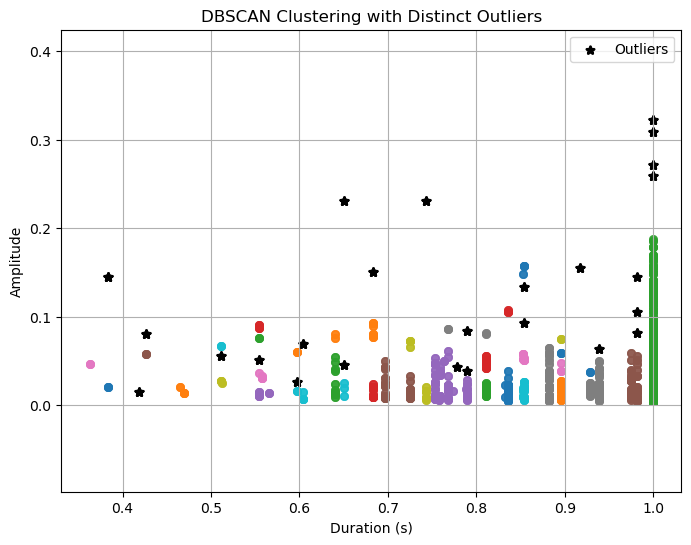

In [43]:
from sklearn.cluster import DBSCAN

# Function to apply DBSCAN and visualize the results
def analyze_outliers_dbscan(X, eps=0.5, min_samples=5):
    # Apply DBSCAN algorithm
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)

    # Identify outliers (points labeled as -1)
    outliers = X[labels == -1]

    # Lets plot it so we can compare
    plot_dbscan_clusters(X, labels, outliers)

# Function to plot clusters and highlight outliers distinctly
def plot_dbscan_clusters(X, labels, outliers):
    unique_labels = set(labels)
    plt.figure(figsize=(8, 6))
    
    # Plot each cluster
    for label in unique_labels:
        if label == -1:
            # Skip outliers for now
            continue
        cluster_points = X[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, alpha=0.6)
    
    # Lets make them black stars this time just to be different
    if len(outliers) > 0:
        plt.scatter(outliers[:, 0], outliers[:, 1], s=30, c='black', marker='*', linewidths=2, label='Outliers')

    # Customize plot
    plt.title('DBSCAN Clustering with Distinct Outliers')
    plt.xlabel('Duration (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()


# Test the function
X = np.array([[durations[i], amplitudes[i]] for key in all_durations.keys() for i in range(len(all_durations[key]))])
analyze_outliers_dbscan(X, eps=0.01, min_samples=5)  # Adjust eps


NOTE: Way more clusters. The outliers are a little be different and in my opinion, a little bit more wrongly marked. It doesnt look like a good approach to me for our case at least

## 4. Data imputation: In this section, we will artificially inject outliers in the dataset and evaluate our capacity to recover those values with a linear model.

4.1. For this exercise, we will create a miniature dataset. Let us consider only
the first 200 songs of each class. For each song, we will use the envelope of
the song (as implemented in 2.4) and downsample it with a factor of 100 (for
each 100 data points of the envelope, we will keep only the first one and
discard the remaining 99). Then, we will concatenate all the sounds within
each class in one single unidimensional array.

In [44]:
# 4.1. For this exercise, we will create a miniature dataset. Let us consider only the first 200 songs of each class. For each song, we will use the envelope of
# the song (as implemented in 2.4) and downsample it with a factor of 100 (for each 100 data points of the envelope, we will keep only the first one and
# discard the remaining 99). Then, we will concatenate all the sounds within each class in one single unidimensional array.

# Creating the miniature dataset
minidataset = {}
originals = {}
downsampled = {}

for key in Commands.keys():
    minidataset[key] = []
    originals[key] = 0
    downsampled[key] = 0
    
    # Process up to 200 songs for each class, and thats it
    n_songs = min(200, len(Commands[key]))
    
    for i in range(n_songs):
        # Load the sound for each song
        fs, y = loadSound(Commands[key][i], key)
        envelope_y = envelope(y, 1)
        
        originals[key] += len(envelope_y)
        
        # Downsample by keeping only every 100th data point
        downsampled_y = envelope_y[::100]
        downsampled[key] += len(downsampled_y)
        
        # Append the downsampled
        minidataset[key].append(downsampled_y)

# Concatenate all the downsampled songs within each class into a single array
minidataset_concatenated = {}
for key in minidataset.keys():
    minidataset_concatenated[key] = np.concatenate(minidataset[key])

# Lets compare the number of samples before and after downsampling
for key in minidataset_concatenated.keys():
    print(f"Class {key}:")
    print(f"  Original number of samples: {originals[key]}")
    print(f"  Downsampled number of samples: {downsampled[key]}")







Class forward:
  Original number of samples: 3153804
  Downsampled number of samples: 31546
Class backward:
  Original number of samples: 3142238
  Downsampled number of samples: 31432
Class left:
  Original number of samples: 3166875
  Downsampled number of samples: 31675
Class right:
  Original number of samples: 3153480
  Downsampled number of samples: 31545
Class stop:
  Original number of samples: 3138606
  Downsampled number of samples: 31400
Class _silence_:
  Original number of samples: 3200000
  Downsampled number of samples: 32000
Class _unknown_:
  Original number of samples: 3122593
  Downsampled number of samples: 31238


4.2. Create a function that injects x% of outliers in a given array. Select randomly x% of the elements of the array and 
update their value to 1.5 (since the envelope of the song is contained in the range [0, 1], the points will become outliers). 

Density of outliers in the original data: {'forward': 2.529639256958093, 'backward': 2.357470094171545, 'left': 2.0142067876874505, 'right': 2.1207798383262007, 'stop': 2.035031847133758, '_silence_': 2.65, '_unknown_': 2.256866636788527}
Density of outliers in the outlier-injected data: {'forward': 2.9987954098776393, 'backward': 3.0064902010689742, 'left': 3.201262825572218, 'right': 3.1225233792994134, 'stop': 3.111464968152866, '_silence_': 3.009375, '_unknown_': 3.066777642614764}


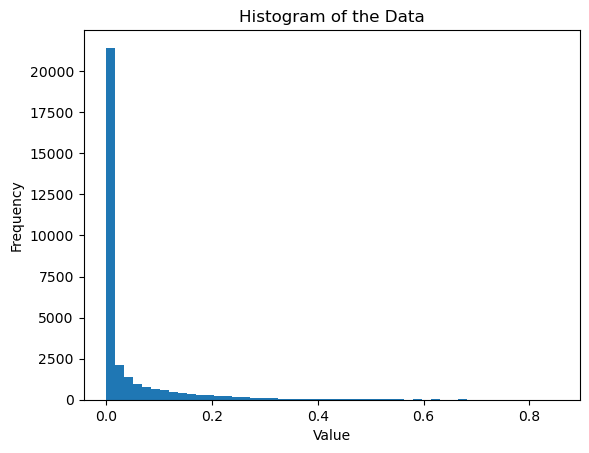

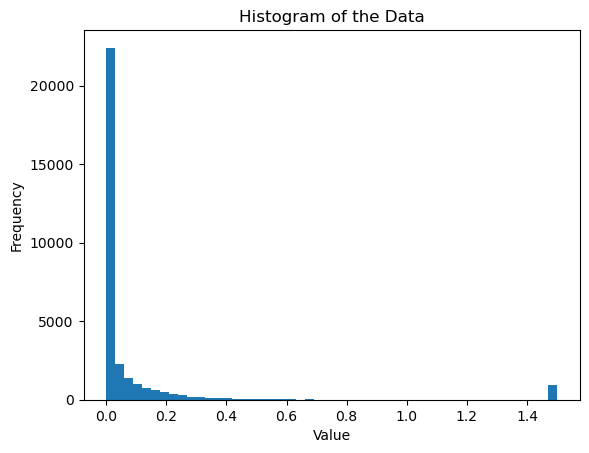

In [45]:
# 4.2. Create a function that injects x% of outliers in a given array. Select randomly x% of the elements of the array and 
# update their value to 1.5 (since the envelope of the song is contained in the range [0, 1], the points will become outliers). 

# Function to inject outliers
def injectOutliers(data, percentage):
    data = data.copy()

    # number of outliers to inject
    n_outliers = int(len(data) * percentage / 100)
    
    # lets make a random selection as the enunciate asks
    indices = np.random.choice(len(data), size=n_outliers, replace=False)
    data[indices] = 1.5
    
    return data, indices

# 4.2.1. Inject 3% of outliers in each class and visualize them with the methods developed in 3.3 and 3.4.
X = minidataset_concatenated
percentage = 3  # Inject 3% outliers

noisy_data = {}
outliers = {}

# Injecting outliers
for key in X:
    noisy_data[key], outliers[key] = injectOutliers(X[key], percentage)

# Calculate the density of outliers in the original and outlier-injected data
original_outliers = {}
injected_outliers = {}

for key in X:
    original_outliers[key], not_used = outliersDensity(X[key], 'zscore', 3)
    injected_outliers[key], not_used = outliersDensity(noisy_data[key], 'zscore', 3)

# Compare the density of outliers in the original and outlier-injected data
print("Density of outliers in the original data:", original_outliers)
print("Density of outliers in the outlier-injected data:", injected_outliers)

# Plot the histograms of the original and outlier-injected data
def histogram(arr):
    plt.hist(arr, bins=50)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of the Data')
    plt.show()

histogram(X['forward'])
histogram(noisy_data['forward'])






4.3. We will now try to recover the original values using a linear model of order
p. Create a function that receives n training samples of vectors with size p,
meaning (xi,1, xi,2, xi,2, ... , xi,p) and the corresponding output yi.

4.4. Find the linear model for each class using the sample dataset (see 4.1),
considering p values before each sample. Then, use it to compute new values
for replacing the outliers injected in 4.2.1. Analyze your prediction error
showing i) the error distribution for each class and ii) Plots showing the
original envelope and the one with the predicted values. Find the best p for
your model.

4.5. Repeat 4.4 using a window of order p centered in the instant to predict.
Compare with the results obtained in 4.4.

In [46]:
# 4.3. We will now try to recover the original values using a linear model of order p. Create a function that receives n training samples of vectors with size p,
# meaning (xi,1, xi,2, xi,2, ... , xi,p) and the corresponding output yi.

# Simplified linear regression function
def linearRegression(noisy_data, p):
    Y = noisy_data[p:]
    X = np.array([np.concatenate(([1], noisy_data[i-p:i])) for i in range(p, len(noisy_data))])
    
    # Calculate beta
    beta = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, Y))
    
    return beta

#Test the function
p = 25  # definir p
beta = linearRegression(noisy_data['forward'], p)

# 4.5
p_centered = 20  # definir p
beta_centered = linearRegression(noisy_data['forward'], p)


# 4.4. Find the linear model for each class using the sample dataset (see 4.1),
# considering p values before each sample. Then, use it to compute new values
# for replacing the outliers injected in 4.2.1. Analyze your prediction error
# showing i) the error distribution for each class and ii) Plots showing the
# original envelope and the one with the predicted values. Find the best p for
# your model 

# First, lets use our beta to predict the values of the outliers
# we will do beta * X, where X is the matrix of the p previous values of the outlier
# we will do this for each outlier in the dataset and replace the outlier with the predicted value
# Function to analyze prediction error and plot results

original = np.copy(minidataset_concatenated['forward'])
predicted = np.copy(minidataset_concatenated['forward'])
predicted_4_5 = np.copy(minidataset_concatenated['forward'])
errors = {}
errors_4_5 = {}

for idx in outliers['forward']:
        if idx >= p:  # Ensure we have p previous values
                # We must  predict the value by doing beta * X, where X is the matrix of the p previous values of the outlier
                X = np.concatenate(([1], predicted[idx-p:idx]))
                predicted_value = sum(beta[i] * X[i] for i in range(len(beta)))

                # 4.5) Same as before, but now we multiply beta by p/2 before and p/2 after values of the outlier so that our p is centered in the outlier
                X_4_5 = np.concatenate(([1], predicted_4_5[idx-p//2:idx+p//2]))

                # We mmust see if there is more than p/2 values after the outlier
                if len(X_4_5) < len(beta_centered):
                    X_4_5 = np.concatenate(([1], predicted_4_5[idx-p_centered:idx+p_centered]))
                predicted_value_4_5 = sum(beta_centered[i] * X_4_5[i] for i in range(len(beta_centered)))

                # Replace the outlier with the predicted value
                predicted[idx] = predicted_value
                errors[idx] = original[idx] - predicted[idx]

                predicted_4_5[idx] = predicted_value_4_5
                errors_4_5[idx] = original[idx] - predicted_4_5[idx]


        # Plot the original point in blue and predicted point in red
        # plt.scatter(idx, original[idx], color='blue', label='Original' if idx == outliers['forward'][0] else "")
        # plt.scatter(idx, predicted[idx], color='red', label='Predicted' if idx == outliers['forward'][0] else "")

# Calculate the mean squared error
mse = np.mean([error**2 for error in errors.values()])
print(f"Mean Squared Error: {mse}")


# 4.5)
mse = np.mean([error**2 for error in errors_4_5.values()])
print(f"Mean Squared Error when window centered in the instant: {mse}")

# plt.title('Original vs. Predicted Values for Outliers')
# plt.xlabel('Index')
# plt.ylabel('Value')

# # Add legend once
# plt.legend(loc='upper right')
# plt.show()






Mean Squared Error: 0.005281182202600166
Mean Squared Error when window centered in the instant: 0.004832659163630415


## 5. Feature extraction: the main goal of this section is extracting characteristic information with discrimination power that a classification system can efficiently use.

5.1. Write a small state-of-the-art on features used for sound classification. Cite
your sources. Select and justify a set of those features to implement. 

After some research, I found this article where i think it explained really well each feature. After doing some cross-checking, i confirmed that the features 
presented in this article wear state-of-the-art features used for sound classification. I will enumerate the features discussed in the article and also mark the ones
im going to implement.

1. Statistical Features: A first easy step is to compute the mean, standard deviation, minimum, maximum, median and quartiles of the frequencies of each signal. This can be done using Numpy and it always brings value to our feature extraction. This kind of approach can be used in gender recognition for example, as seen on Kaggle.

2. Energy: The energy of a signal is the total magnitude of the signal, i.e. how loud the signal is. What i want to do is to implement an Energy Entropy feature

3. Root Mean Square Energy:The RMS Energy (RMSE) is simply the square root of the mean squared amplitude over a time window. I will implement this feature

4. Zero-Crossing Rate: The zero crossing rate indicates the number of times that a signal crosses the horizontal axis, i.e. the number of times that the amplitude reaches 0.
5. Tempo: An estimate of the tempo in Beats Per Minute (BPM).

6. Mel Frequency Cepstral Coefficients (MFCC): In this ones the author bases on other article (http://www.practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/). The MFCC are state-of-the-art features for speaker identification, disease detection, speech recognition, and by far the most used among all features present in this article. This are ones of the features that I seak to implement.

7. Mel Frequency Cepstral Differential Coefficients: MFCC lacks information on the evolution of the coefficients between frames. What we can therefore do is to compute the 12 trajectories of the MFC coefficients and append them to the 12 original coefficients. This highly improves results on ASR tasks. I will also being implementing this features.


8. Polyfeatures: The polyfeatures returns the coefficients of fitting an nth-order polynomial to the columns of a spectrogram. This can be easily extracted using Librosa.
9. Tempogram: The tempo, measured in Beats Per Minute (BPM) measures the rate of the musical beat. The tempogram is a feature matrix which indicates the prevalence of certain tempi at each moment in time. Librosa has a built-in function to extract this information.

10. Spectal Features: Spectral features are extracted from the spectrogram. Spectrograms offer a powerful representation of the data. It plots over the time, for a given range of frequencies, the power (dB) of a signal. This allows us to spot periodic patterns over time, and regions of activity.
I will try to implement some spectral features. 

(...)

https://maelfabien.github.io/machinelearning/Speech9/#4-zero-crossing-rate

Implemented Features:

MFCCs: I will apply this feature because

RMS Energy:

Energy Entroypy:

Spectral Centroid:

Spectral Bandwidth:

MFCDC:

5.2. Create a function that extracts those features from a sound. You must end
up with more than 25 features per sound. One option to have more features
is to segment the sound into different parts (first 200ms, 200ms-400ms, etc)
and extract features for each part

In [47]:
import librosa
import os

# Function to extract features from a single audio file
def extractFeatures(audio_path, sample_rate=16000):

    # Just in case the file does not exist
    if not os.path.isfile(audio_path):
        print(f"Error: File {audio_path} does not exist.")
        return None

    try:
        y, sr = librosa.load(audio_path, sr=sample_rate)

    # One more precaution in case of any error    
    except Exception as e:
        print(f"Error loading audio file: {e}")
        return None

    features = []

        
    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    features.extend(mfccs.mean(axis=1))

    # RMS Energy
    rms_energy = librosa.feature.rms(y=y)
    features.append(rms_energy.mean())

    # Energy Entropy
    energy_entropy = -np.sum(rms_energy * np.log2(rms_energy + 1e-10))
    features.append(energy_entropy)

    # Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    features.append(spectral_centroid.mean())

    # Spectral Bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    features.append(spectral_bandwidth.mean())

    # Mel Frequency Cepstral Differential Coefficients
    mfcc_delta = librosa.feature.delta(mfccs)
    features.extend(mfcc_delta.mean(axis=1))


    return np.array(features)

# Function to iterate over all classes and files to generate feature_data and classes
def allFeaturesByClass(Commands):
    feature_data = []
    classes = []

    for label, files in Commands.items():
        for file_path in files:
            # Extract features for each file
            features = extractFeatures("dataset" + f"/{label}/" + file_path)
            #print(len(features)) # We have approximately 30 features per sound. NOTE: THIS IS NOT A CONSTANT VALUE. ITS CONSTANTLY CHANGING BECAUSE IM CHANGING THE FEATURES.
            if features is not None:
                feature_data.append(features)
                classes.append(label)  # Assign class label for each file

    return feature_data, classes

# Example usage with Commands dictionary
# Commands = {
#     "forward": ["dataset/forward/0a2b400e_nohash_0.wav", ...],
#     "left": ["dataset/left/1b2c300f_nohash_0.wav", ...],
#     # Other classes and their respective files
# }

feature_data, classes = allFeaturesByClass(Commands)
#print(classes)


dict_keys(['forward', 'backward', 'left', 'right', 'stop', '_silence_', '_unknown_'])
Number of samples: 15715
Number of features per sample: 30


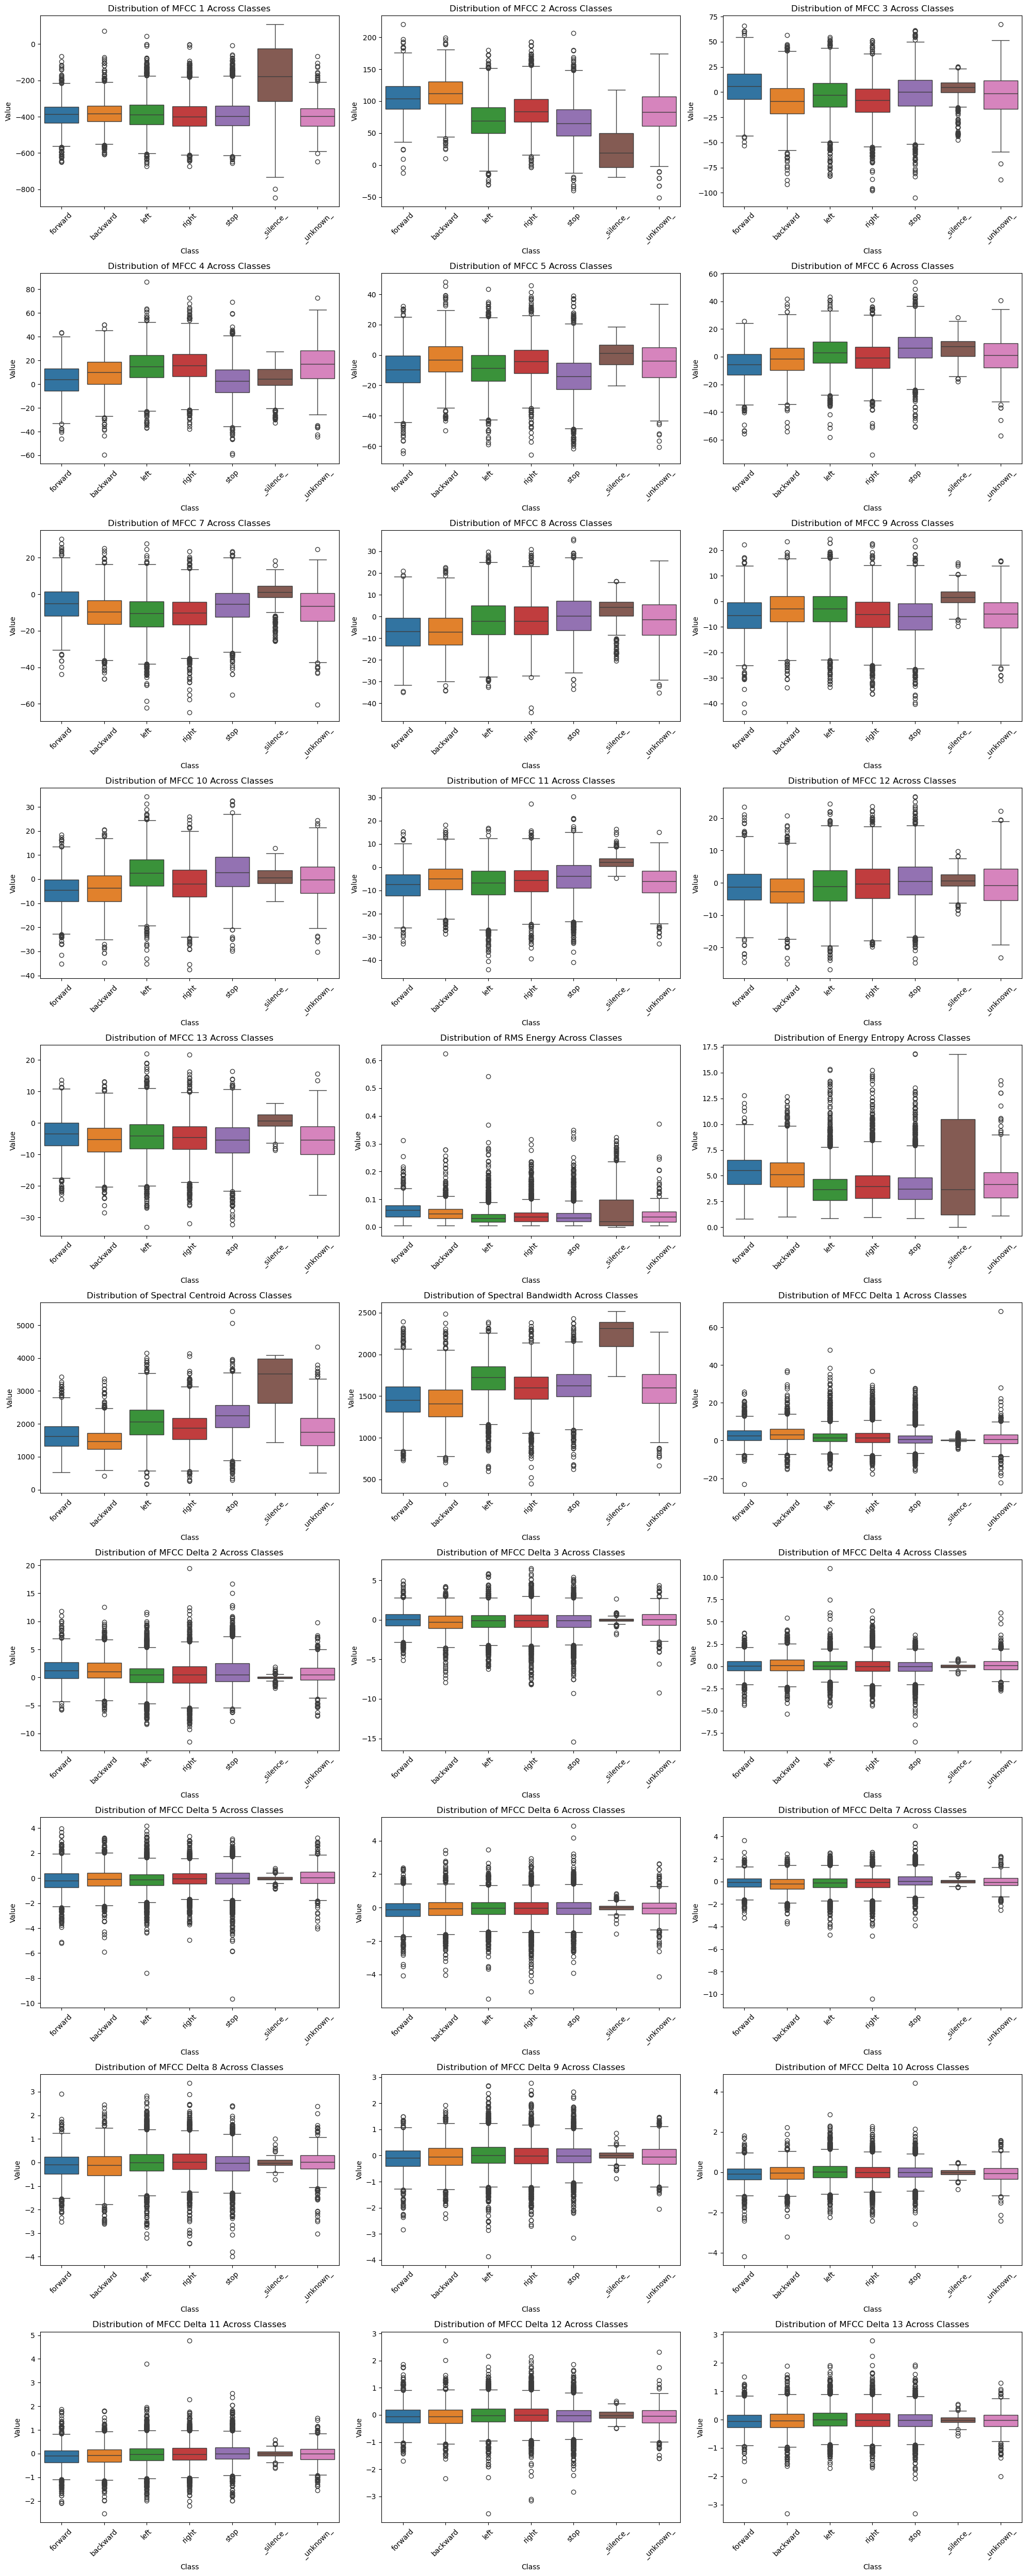

In [48]:
import pandas as pd
import seaborn as sns

# create a dict with the feature_data and classes to better organization
dict_features = {}
for i in range(len(classes)):
    if classes[i] not in dict_features:
        dict_features[classes[i]] = []
    dict_features[classes[i]].append(feature_data[i])

print(dict_features.keys())
print("Number of samples:", len(feature_data))
print("Number of features per sample:", len(feature_data[5]))

# to better vizualization when we will see how the features are distributed.
# Flatten the data to create a DataFrame suitable for plotting
flattened_data = []
for label, features in dict_features.items():
    for feature_vector in features:
        for i, value in enumerate(feature_vector):
            flattened_data.append({"Feature": f"Feature {i+1}", "Value": value, "Class": label})

# Convert to a DataFrame for easy plotting with seaborn
df = pd.DataFrame(flattened_data)

# Get the list of unique feature names
unique_features = df["Feature"].unique()


num_features = len(unique_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 5))

feature_names = {
    0: "MFCC 1", 1: "MFCC 2", 2: "MFCC 3", 3: "MFCC 4", 4: "MFCC 5", 5: "MFCC 6", 6: "MFCC 7", 7: "MFCC 8",
    8: "MFCC 9", 9: "MFCC 10", 10: "MFCC 11", 11: "MFCC 12", 12: "MFCC 13", 13: "RMS Energy",
    14: "Energy Entropy", 15: "Spectral Centroid", 16: "Spectral Bandwidth", 17: "MFCC Delta 1",
    18: "MFCC Delta 2", 19: "MFCC Delta 3", 20: "MFCC Delta 4", 21: "MFCC Delta 5", 22: "MFCC Delta 6",
    23: "MFCC Delta 7", 24: "MFCC Delta 8", 25: "MFCC Delta 9", 26: "MFCC Delta 10", 27: "MFCC Delta 11",
    28: "MFCC Delta 12", 29: "MFCC Delta 13"
}

# Loop through each feature to create a subplot
for i, feature in enumerate(unique_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x="Class", y="Value", data=df[df["Feature"] == feature], hue="Class", legend=False)
    plt.title(f"Distribution of {feature_names[i]} Across Classes")
    plt.xticks(rotation=45)

# Adjust layout for readability
plt.tight_layout()
plt.show()


5.3. Create a function that, given a variable/feature, finds its statistical power in
discriminating between the classes of the problem. Start by checking the normality of its 
distribution and then select the correct test to apply. To select the right test, we suggest you to check the reference:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2881615/.

5.3.1. Justify the choice(s) of the test(s).

I choose Shapiro-Wilk to test the distribution of each feature in each class. This test is recommended when we have smaller/more moderate sample size. It also tests the features independently for each class. After testing if its normal or not-normal, we have two possible tests: IF normal, we test with ANOVA, if not we use Kruskal.
Basing myself on the paper, ANOVA is recommended for comparing multiple groups, as it has high power to detect mean differences when assumptions are met (normality and homogeneity of variances). Kruskal is a non-parametric and robust alternative to ANOVA when the data is not normal. Its very effective to compare the distribution of multiple independent groups without relying on normality.  

5.3.2. Rank your feature set by statistical significance. Present them
in a table showing the feature name, the result of the normality
assessment, the name of the test applied, and its result

In [49]:
import scipy.stats as stats
import pandas as pd

# Function to calculate the statistical power of a single feature across classes
def discriminativePower(dict_features, feature_idx, alpha=0.05):
    # Separate the feature data by class for the given feature index
    classes = list(dict_features.keys())
    grouped_data = [np.array([features[feature_idx] for features in dict_features[label]]) for label in classes]
    normality = ""

    # Step 1: Check normality for each class using Shapiro-Wilk test
    normal = True
    for data in grouped_data:
        stat, p = stats.shapiro(data)
        if p < alpha:
            normal = False
            break

    # Step 2: Select the appropriate test based on normality
    if normal:
        # If normal, use ANOVA
        stat, p_value = stats.f_oneway(*grouped_data)
        test_name = "ANOVA"
        normality = "Normal"
        
        
    else:
        # If non-normal, use Kruskal-Wallis test
        stat, p_value = stats.kruskal(*grouped_data)
        test_name = "Kruskal-Wallis"
        normality = "Non-Normal"
        

    return test_name, p_value, normality

# Initialize a list to store each row of the table
results = []

# Table for 5.3.2
for feature_idx in range(len(feature_data[0])):
    test_name, p_value, normality = discriminativePower(dict_features, feature_idx)

    feature_names = {
    0: "MFCC 1", 1: "MFCC 2", 2: "MFCC 3", 3: "MFCC 4", 4: "MFCC 5", 5: "MFCC 6", 6: "MFCC 7", 7: "MFCC 8",
    8: "MFCC 9", 9: "MFCC 10", 10: "MFCC 11", 11: "MFCC 12", 12: "MFCC 13", 13: "RMS Energy",
    14: "Energy Entropy", 15: "Spectral Centroid", 16: "Spectral Bandwidth", 17: "MFCC Delta 1",
    18: "MFCC Delta 2", 19: "MFCC Delta 3", 20: "MFCC Delta 4", 21: "MFCC Delta 5", 22: "MFCC Delta 6",
    23: "MFCC Delta 7", 24: "MFCC Delta 8", 25: "MFCC Delta 9", 26: "MFCC Delta 10", 27: "MFCC Delta 11",
    28: "MFCC Delta 12", 29: "MFCC Delta 13"
    }

    feature_name = feature_names.get(feature_idx, "Unknown Feature")




    # Append the result as a dictionary for easy DataFrame conversion
    results.append({
        "Feature": feature_name,
        "Normality": normality,
        "Test": test_name,
        "P-Value": p_value,
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results).sort_values(by="P-Value").reset_index(drop=True)

# Print the table
print("Exercise 5.3.2 - Ranked Feature Set by Statistical Significance")
print(results_df)



Exercise 5.3.2 - Ranked Feature Set by Statistical Significance
               Feature   Normality            Test        P-Value
0               MFCC 2  Non-Normal  Kruskal-Wallis   0.000000e+00
1               MFCC 4  Non-Normal  Kruskal-Wallis   0.000000e+00
2               MFCC 5  Non-Normal  Kruskal-Wallis   0.000000e+00
3               MFCC 6  Non-Normal  Kruskal-Wallis   0.000000e+00
4              MFCC 10  Non-Normal  Kruskal-Wallis   0.000000e+00
5   Spectral Bandwidth  Non-Normal  Kruskal-Wallis   0.000000e+00
6    Spectral Centroid  Non-Normal  Kruskal-Wallis   0.000000e+00
7       Energy Entropy  Non-Normal  Kruskal-Wallis  1.388583e-284
8               MFCC 8  Non-Normal  Kruskal-Wallis  3.186628e-247
9               MFCC 7  Non-Normal  Kruskal-Wallis  6.144101e-237
10          RMS Energy  Non-Normal  Kruskal-Wallis  1.229435e-227
11             MFCC 11  Non-Normal  Kruskal-Wallis  3.842229e-209
12              MFCC 3  Non-Normal  Kruskal-Wallis  3.438698e-183
13        MF

## 6. Feature transformation and selection: the main goal of this section is to reduce the space of the problem by transforming the feature space into a smaller space while retaining most of its discriminative power.

6.1. Develop the code needed to implement a Principal Component Analysis to
the feature set.

6.1.1. Determine the importance of each vector in explaining the
variability of the feature space. Note that you should normalize
the features using the z-score. How many transformed variables
should you use to explain 75% of the feature set?

Number of transformed variables to explain 75% of the feature set: 15


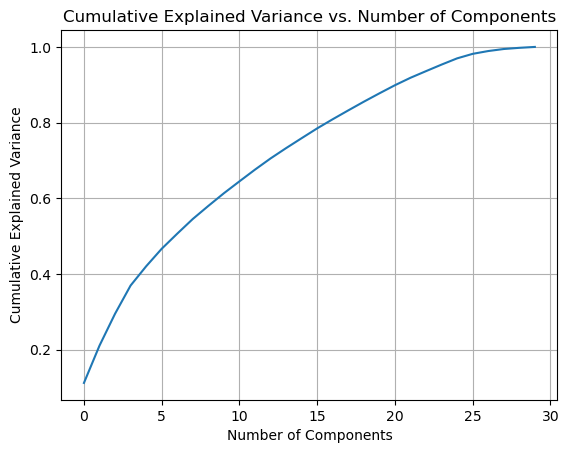

In [50]:
# 6.1.1. Determine the importance of each vector in explaining the
# variability of the feature space. Note that you should normalize
# the features using the z-score. How many transformed variables
# should you use to explain 75% of the feature set?

# NOTE: We will always create a new variable so we dont change our original feature data.

# Normalize the feature data using z-score
feature_data_normalized = (feature_data - np.mean(feature_data, axis=0)) / np.std(feature_data, axis=0)

# Calculate the covariance matrix
cov_matrix = np.cov(feature_data_normalized.T)

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Determine the number of transformed variables to explain 75% of the feature set
n_components = np.argmax(cumulative_variance >= 0.75) + 1

# Print the number of transformed variables
print(f"Number of transformed variables to explain 75% of the feature set: {n_components}")

# create a plot with the importance of each vector
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

6.1.2. Transform the feature set.

In [ ]:
# 6.1.2. Transform the feature set.
# Transform the feature set using the eigenvectors
transformed_features = np.dot(feature_data, eigenvectors[:, :n_components])

# Print the shape of the transformed features
print(f"Shape of transformed features: {transformed_features.shape}")

# Lets print the names of the features that we will use
print("Features used:")
for i in range(n_components):
    print(f"{feature_names[i]}")

Shape of transformed features: (15715, 15)
Features used:
MFCC 1
MFCC 2
MFCC 3
MFCC 4
MFCC 5
MFCC 6
MFCC 7
MFCC 8
MFCC 9
MFCC 10
MFCC 11
MFCC 12
MFCC 13
RMS Energy
Energy Entropy


6.1.3. Create a function that, given the features of a new sound,
applies the same PCA transformation to it (uses the weights
computed with the dataset) and returns only the transformed
variables corresponding to the first 75% of the variance explained

In [ ]:
# 6.1.3. Create a function that, given the features of a new sound,
# applies the same PCA transformation to it (uses the weights
# computed with the dataset) and returns only the transformed
# variables corresponding to the first 75% of the variance explained.

# Function to apply PCA transformation
def pcaTransformation(new_features, eigenvectors, n_components):
    # Normalize the new features using z-score
    new_features_normalized = (new_features - np.mean(new_features, axis=0)) / np.std(new_features, axis=0)
    
    # Transform the new features using the eigenvectors
    transformed_new_features = np.dot(new_features_normalized, eigenvectors[:, :n_components])
    
    return transformed_new_features

# Test the function with a new sound
new_sound_features = extractFeatures("dataset/forward/0a2b400e_nohash_0.wav")
transformed_new_features = pcaTransformation(new_sound_features, eigenvectors, n_components)

# Print the shape of the transformed new features
print(f"Shape of new features: {new_sound_features.shape}")
print(f"Shape of transformed new features: {transformed_new_features.shape}")


Shape of new features: (30,)
Shape of transformed new features: (15,)


6.2. Implement the Fisher Score and ReliefF methods.

6.2.1. Identify the top 10 features using each of those methods.
Comment on the differences between the two approaches.

In [53]:
# 6.2. Implement the Fisher Score and ReliefF methods.
# 6.2.1. Identify the top 10 features using each of those methods.
# Comment on the differences between the two approaches.

from sklearn.metrics import pairwise_distances

# Function to calculate the Fisher Score for each feature
def fisher_score(feature_data, classes):
    # Separate the feature data by class
    classes_unique = np.unique(classes)
    grouped_data = [np.array([features for features, label in zip(feature_data, classes) if label == class_label]) for class_label in classes_unique]

    # Calculate the mean and standard deviation for each feature in each class
    means = [np.mean(group, axis=0) for group in grouped_data]
    std_devs = [np.std(group, axis=0) for group in grouped_data]

    # Calculate the Fisher Score for each feature
    fisher_scores = []
    for i in range(len(feature_data[0])):
        score = sum((means[j][i] - means[k][i])**2 / (std_devs[j][i]**2 + std_devs[k][i]**2) for j in range(len(classes_unique)) for k in range(j+1, len(classes_unique)))
        fisher_scores.append(score)

    return fisher_scores

# Calculate the Fisher Score for each feature
fisher_scores = fisher_score(feature_data, classes)

# Sort the Fisher Scores in descending order
sorted_indices = np.argsort(fisher_scores)[::-1]
top_10_fisher_scores = [(i, fisher_scores[i]) for i in sorted_indices[:10]]
print("Top 10 features using Fisher Score:")
for i, score in top_10_fisher_scores:
    print(f"{feature_names[i]}: {score:.4f}")


# Function to calculate the ReliefF score for each feature
def reliefF(feature_data, classes, k=10):
    n_samples, n_features = feature_data.shape
    relief_scores = np.zeros(n_features)
    
    # Calculate pairwise distances
    distances = pairwise_distances(feature_data, feature_data)
    
    # Iterate through each sample
    for i in range(n_samples):
        # Get label and distances for the current instance
        current_label = classes[i]
        distances_i = distances[i]
        
        # Find k nearest hits and misses
        same_class_idx = np.where(classes == current_label)[0]
        diff_class_idx = np.where(classes != current_label)[0]
        
        nearest_hits = same_class_idx[np.argsort(distances_i[same_class_idx])[1:k+1]]
        nearest_misses = diff_class_idx[np.argsort(distances_i[diff_class_idx])[:k]]
        
        # Update relief scores
        for j in range(n_features):
            relief_scores[j] -= np.sum((feature_data[i, j] - feature_data[nearest_hits, j])**2) / (k * n_samples)
            relief_scores[j] += np.sum((feature_data[i, j] - feature_data[nearest_misses, j])**2) / (k * n_samples)

    return relief_scores

# Calculate the ReliefF scores for each feature
relief_scores = reliefF(np.array(feature_data), np.array(classes))

# Sort the ReliefF scores in descending order and get the top 10 features
sorted_indices_relief = np.argsort(relief_scores)[::-1]
top_10_relief_scores = [(i, relief_scores[i]) for i in sorted_indices_relief[:10]]
print("\nTop 10 features using ReliefF:")
for i, score in top_10_relief_scores:
    print(f"{feature_names[i]}: {score:.4f}")


Top 10 features using Fisher Score:
Spectral Bandwidth: 36.1566
Spectral Centroid: 22.0599
MFCC 2: 20.6836
MFCC 11: 7.7205
MFCC 1: 4.6557
MFCC 13: 4.5977
MFCC 4: 3.9684
MFCC 9: 3.9210
MFCC 8: 3.6892
MFCC 7: 3.5365

Top 10 features using ReliefF:
MFCC 1: 140.7581
MFCC 4: 25.3941
MFCC 7: 22.2363
MFCC 6: 13.7652
MFCC 3: 12.0338
MFCC 10: 10.1564
MFCC 11: 9.4865
MFCC 8: 5.9933
MFCC 13: 2.8424
MFCC Delta 1: 2.4602


COMPARISSONS: Fisher Score clearly relies more on class-wise means and variances to identify features that maximize separation between classes in terms of mean difference. In this rank, we can se that the spectral features have higher scores. This is a consequence of what we see in the plots we did in 5.2, where we can see clearly that these are the features that have more differences in the mean between classes.
As for the ReliefF ranking, the focus is more measuring each feature's contribution to distinguish individual samples between classes, focusing on local feature relevance.  

6.2.2. Transform the feature set.

In [65]:
# 6.2.2 Transform the features set.

# Combine top features from Fisher Score and ReliefF
top_fisher_indices = [i for i, _ in top_10_fisher_scores]
top_relief_indices = [i for i, _ in top_10_relief_scores]

# Transform the feature data by selecting only the chosen features
transformed_features_fisher = np.array(feature_data)[:, top_fisher_indices]
transformed_features_relief = np.array(feature_data)[:, top_relief_indices]

# Print the names of selected features for reference
print("\nSelected features using Fisher Score:")
for i in top_fisher_indices:
    print(f"{feature_names[i]}")

print("Transformed feature set shape:" , transformed_features_fisher.shape)

print("\nSelected features using ReliefF:")
for i in top_relief_indices:
    print(f"{feature_names[i]}")

print("Transformed feature set shape:" , transformed_features_relief.shape)



Selected features using Fisher Score:
Spectral Bandwidth
Spectral Centroid
MFCC 2
MFCC 11
MFCC 1
MFCC 13
MFCC 4
MFCC 9
MFCC 8
MFCC 7
Transformed feature set shape: (15715, 10)

Selected features using ReliefF:
MFCC 1
MFCC 4
MFCC 7
MFCC 6
MFCC 3
MFCC 10
MFCC 11
MFCC 8
MFCC 13
MFCC Delta 1
Transformed feature set shape: (15715, 10)


6.2.3. Create a function that, given the features of a new sound,
returns only the top 10 features based on the Fisher Score or the
ReliefF method

In [ ]:
# List of feature names, assuming they correspond to indices in the feature arrays
feature_names = [
    "MFCC 1", "MFCC 2", "MFCC 3", "MFCC 4", "MFCC 5", "MFCC 6", "MFCC 7", "MFCC 8",
    "MFCC 9", "MFCC 10", "MFCC 11", "MFCC 12", "MFCC 13", "RMS Energy", "Energy Entropy",
    "Spectral Centroid", "Spectral Bandwidth", "MFCC Delta 1", "MFCC Delta 2", "MFCC Delta 3",
    "MFCC Delta 4", "MFCC Delta 5", "MFCC Delta 6", "MFCC Delta 7", "MFCC Delta 8",
    "MFCC Delta 9", "MFCC Delta 10", "MFCC Delta 11", "MFCC Delta 12", "MFCC Delta 13"
]

# Function to get the top 10 features based on Fisher Score or ReliefF
def getTopFeatures(new_sound_features, feature_data, classes, method="fisher"):
    # Compute feature scores based on the selected method
    if method == "fisher":
        scores = fisher_score(feature_data, classes)
    elif method == "relief":
        scores = reliefF(feature_data, classes)
    else:
        raise ValueError("Method should be either 'fisher' or 'relief'")

    # Get indices of the top 10 features based on the scores
    top10 = np.argsort(scores)[-10:][::-1]  # Sort and select top 10

    # Extract the selected top 10 feature names and values for the new sound
    top_feature_names = [feature_names[i] for i in top10]
    top_feature_values = new_sound_features[top10]

    # top10 features scores
    top_feature_scores = {feature_names[i]: scores[i] for i in top10}
    
    # Return both the feature and scores
    return list(zip(top_feature_names, top_feature_values)), top_feature_scores

# Test the function with the new sound features
top_fisher_features, fisher_scores = getTopFeatures(new_sound_features, np.array(feature_data), np.array(classes), method="fisher")
top_relief_features, relief_scores = getTopFeatures(new_sound_features, np.array(feature_data), np.array(classes), method="relief")


# Print the top 10 features based on Fisher Score and ReliefF
print("Top 10 Features based on Fisher Score:")
for name, score in fisher_scores.items():
    print(f"{name}: {score:.4f}")

print("\nTop 10 Features based on ReliefF:")
for name, score in relief_scores.items():
    print(f"{name}: {score:.4f}")




Top 10 Features based on Fisher Score:
Spectral Bandwidth: 36.1566
Spectral Centroid: 22.0599
MFCC 2: 20.6836
MFCC 11: 7.7205
MFCC 1: 4.6557
MFCC 13: 4.5977
MFCC 4: 3.9684
MFCC 9: 3.9210
MFCC 8: 3.6892
MFCC 7: 3.5365

Top 10 Features based on ReliefF:
MFCC 1: 140.7581
MFCC 4: 25.3941
MFCC 7: 22.2363
MFCC 6: 13.7652
MFCC 3: 12.0338
MFCC 10: 10.1564
MFCC 11: 9.4865
MFCC 8: 5.9933
MFCC 13: 2.8424
MFCC Delta 1: 2.4602


6.3. Discuss the differences, advantages, and disadvantages of the approaches used
in points 6.1 and 6.2.